<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/CNN%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('dataset1.csv',)

In [55]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [53]:
scaled_data = data[['UNIXTime','Radiation']].iloc[:31000,:]
scaled_data.set_index('UNIXTime',drop=True,inplace=True)
scaled_data.tail()

,Radiation
UNIXTime,
1481318139,120.52
1481317850,107.32
1481317540,144.85
1481317251,179.73
1481316953,193.00


In [56]:
MMS = MinMaxScaler()
scaled_data[scaled_data.columns] = MMS.fit_transform(scaled_data)
scaled_data.head()

,Radiation
UNIXTime,
1475229326,0.000062
1475229023,0.000062
1475228726,0.000075
1475228421,0.000062
1475228124,0.000037


In [60]:
training_size = round(len(scaled_data) * 0.80)
train_data = scaled_data[:training_size]
test_data  = scaled_data[training_size:]

In [61]:
def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [62]:
X_train, y_train = create_sequence(train_data,100)
X_val, y_val = create_sequence(test_data,100)

print(X_train.shape, X_val.shape)

(24700, 100, 1) (6100, 100, 1)


In [63]:
from keras.layers import Bidirectional,LSTM,Dense,Flatten,Conv1D,MaxPooling1D,Dropout,RepeatVector
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop=EarlyStopping(monitor='loss',patience=5)

In [68]:
model=Sequential([Conv1D(100,kernel_size=3,input_shape=(100,1),activation='relu'),
                  Conv1D(100,kernel_size=3),
                  Conv1D(100,kernel_size=3),
                  MaxPooling1D(2),
                 Flatten(),
                  RepeatVector(30),
                 LSTM(128,activation='relu',return_sequences=True),
                 LSTM(128,activation='relu',return_sequences=True),
                  Bidirectional(LSTM(64,activation='relu')),
                 Dense(128,activation='relu'),
                 Dense(1)])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, verbose=1, shuffle =True)

Epoch 1/20
772/772 [==============================] - 507s 649ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 1.6393e-04
Epoch 2/20
772/772 [==============================] - 493s 639ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 1.6393e-04
Epoch 3/20
772/772 [==============================] - 491s 637ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 1.6393e-04
Epoch 4/20
772/772 [==============================] - 492s 637ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 1.6393e-04
Epoch 5/20
772/772 [==============================] - 492s 637ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 1.6393e-04
Epoch 6/20
772/772 [==============================] - 493s 638ms/step - loss: 0.0029 - accuracy: 4.0486e-05 - val_loss: 0.0018 - val_accuracy: 1.6393e-04
Epoch 7/20
772/772 [==============================] - 496s 643ms/step - loss

In [70]:
test_predicted = model.predict(X_val)

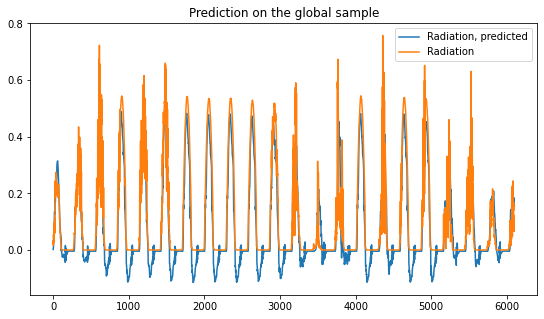

In [71]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(test_predicted,label='Radiation, predicted')
plt.plot(y_val,label="Radiation")
plt.title('Prediction on the global sample')
plt.legend()

In [72]:
y_val2=scaler.inverse_transform(y_val)

In [74]:
test_predicted2=scaler.inverse_transform(test_predicted)

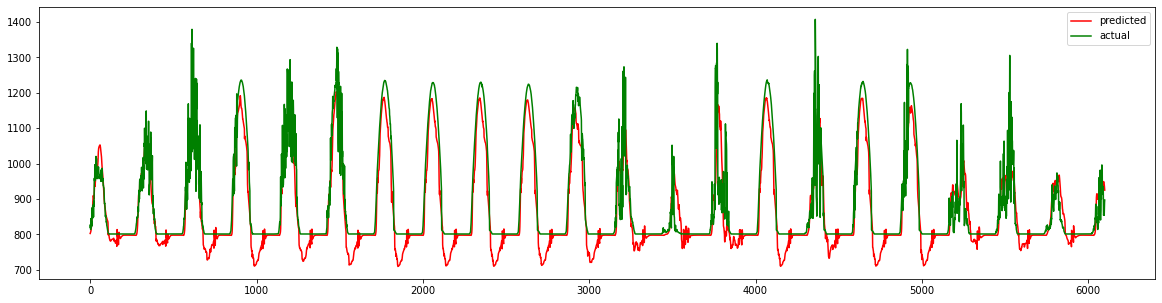

In [75]:
plt.figure(figsize=(20,5))
plt.plot(test_predicted2,'r',label='predicted')
plt.plot(y_val2,'g',label='actual')
plt.legend()
plt.show()

In [79]:
from sklearn import metrics
score = metrics.mean_squared_error(test_predicted,y_val)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.005094868157104635


In [77]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(test_predicted,y_val))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.07137834515526845
